In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import time


In [56]:
# read the data
df=pd.read_csv('housing.csv')


## Preprocessing

In [57]:
# # Preprocessing:
print('name of columns = ',df.columns)
print('overall shape of dataframe ',df.shape)
print('top 5 rows of dataset ',df.head(n=5))


name of columns =  Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')
overall shape of dataframe  (20640, 10)
top 5 rows of dataset     longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       

### Data Summury :
    There are 10 coloums. Target = "mean_house_value". 
    Total Examples = 20640 (before cleaning, removing NAN and outliers)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12a727ad0>,
      dtype=object)

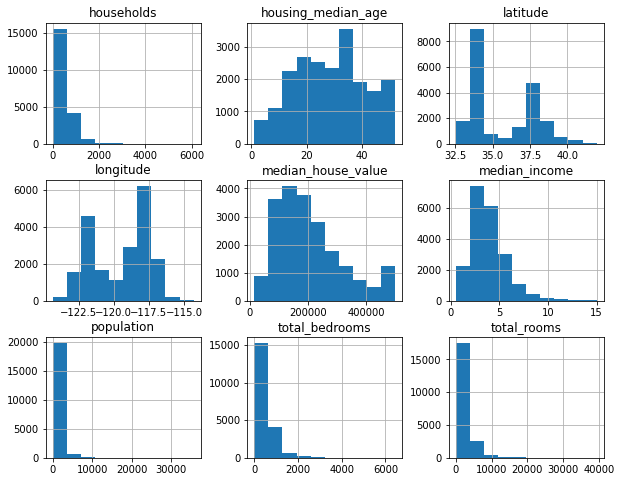

In [58]:
# data visualization
df.hist(figsize=[10,8])

In [59]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [60]:
# coefficient of variance:
cv = (df.var()/df.mean())
cv


longitude                -0.033572
latitude                  0.128040
housing_median_age        5.530695
total_rooms            1805.718101
total_bedrooms          330.126601
population              899.678274
households              292.621479
median_income             0.932480
median_house_value    64374.057070
dtype: float64

### Primary analysis:
    1. target has huge variance.
    2. Features having outliers: households , population, total_bedrooms, total_rooms

### Suggestions:
    1. remove outlier from features. 

In [61]:
# remove outliers
df.shape
for i in ['households' , 'population', 'total_bedrooms', 'total_rooms']:
    df=df[df[i]<df[i].quantile(0.99)]

df.shape


(19622, 10)

In [62]:
cv=df.var()/df.mean()

longitude                -0.033534
latitude                  0.128622
housing_median_age        5.280686
total_rooms             745.528156
total_bedrooms          153.428495
population              416.504107
households              139.829946
median_income             0.931147
median_house_value    64855.851914
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12b7e50d0>,
      dtype=object)

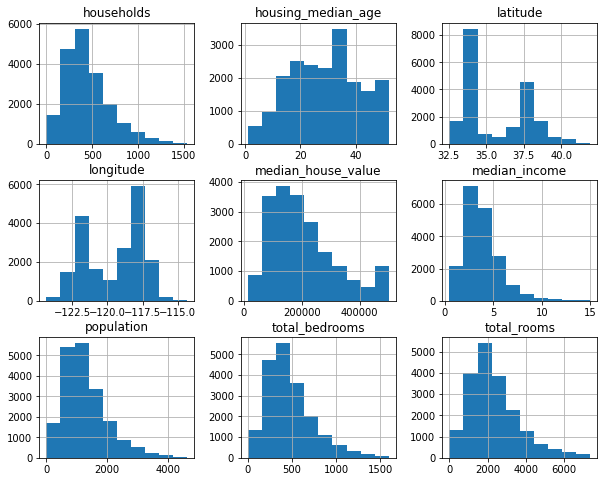

In [63]:
df.hist(figsize=(10,8))

### after outliers are removed
    1. Total sample = 19622
    2. 'Ocean_proximity' is catagorical and dtype is string. Convert it to numeric 

In [64]:
# 'Ocean_proximity'
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [65]:
# using label encode from scikit learn # one hot encoder
from sklearn.preprocessing import LabelEncoder 

encode=LabelEncoder()

In [66]:
# encode 'ocean_proximity'
df['ocean_proximity'] = encode.fit_transform(df['ocean_proximity'])

In [67]:
df['ocean_proximity'].value_counts()

0    8681
1    6180
4    2551
3    2205
2       5
Name: ocean_proximity, dtype: int64

### Check covariance among features

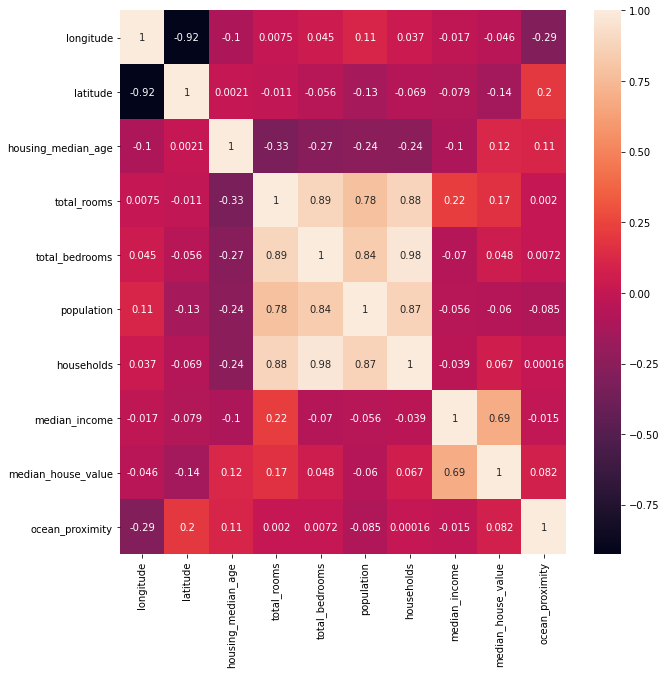

In [147]:
# heat map
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(df.corr(),annot=True,ax=ax)

### NOTE :  
Unbalane in catagorical data distribution.

heatmap shows that there are correlation between total_rooms,total_bedrooms,households and population. We can drop all and pick only one of them.

In [132]:
# X and Y
X=df.loc[:,df.columns!='median_house_value']
features=X.columns
X=X.to_numpy()
Y=df['median_house_value']
# Y=Y.to_numpy()

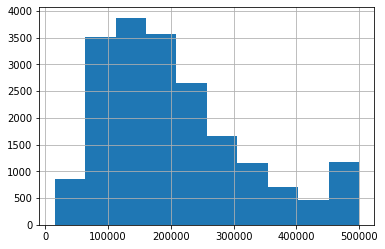

In [134]:
Y.hist()

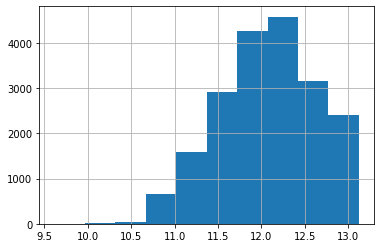

In [135]:
Y_log=np.log(Y+eps)
Y_log.hist()

In [138]:
Y_log.var()

13356805578.834276

In [118]:
# X_train, Y_train, X_test, Y_test
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=1)

# Without Normalization

In [77]:
# linear regression

reg=LinearRegression().fit(X_train,Y_train)
print('score on training: {:.3f}'.format(reg.score(X_train,Y_train)))

print('score on test: {:.3f}'.format(reg.score(X_test,Y_test))) 
print(reg.coef_)
print(reg.intercept_) 

score on training: 0.650
score on test: 0.652
[-4.22787365e+04 -4.21565835e+04  1.12166076e+03 -1.37163993e+01
  1.91680698e+02 -6.13258516e+01  6.22180253e+01  4.11462472e+04
 -9.37661766e+02]
-3546610.711639609


# with normalization of input features only

In [78]:
# with normalization mean/std 
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [79]:
# linear regression 

reg=LinearRegression().fit(X_train,Y_train)
print('score on training: {:.3f}'.format(reg.score(X_train,Y_train))) 

print('score on test: {:.3f}'.format(reg.score(X_test,Y_test))) 
print(reg.coef_) 
print(reg.intercept_)

score on training: 0.650
score on test: 0.652
[-84709.47175184 -90752.24913207  13900.94052625 -17995.10624358
  51871.64779693 -44533.52585649  15537.73957207  77673.2148304
  -1334.16965101]
205185.5315303189


# With max-min normalization

In [93]:
# max min normalization
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [94]:
# linear regression 

reg=LinearRegression().fit(X_train,Y_train)
print('score on training: {:.3f}'.format(reg.score(X_train,Y_train))) 

print('score on test: {:.3f}'.format(reg.score(X_test,Y_test))) 
print(reg.coef_) 
print(reg.intercept_)

score on training: 0.650
score on test: 0.652
[-422364.57769392 -395428.75341884   57204.69881203 -101117.29590093
  306305.75565939 -284245.32221461   95504.66880298  596628.81297287
   -3750.64706378]
358594.1663812353


# Without Normalization of X, log(Y)

In [130]:
# log (Y)
eps = 0.00001
Y_train , Y_test = np.log(Y_train + eps) , np.log(Y_test+eps) 

In [98]:
# linear regression

reg=LinearRegression().fit(X_train,Y_train)
print('score on training: {:.3f}'.format(reg.score(X_train,Y_train)))

print('score on test: {:.3f}'.format(reg.score(X_test,Y_test))) 
print(reg.coef_)
print(reg.intercept_) 

score on training: 0.655
score on test: 0.657
[-2.80787515e-01 -2.82695270e-01  3.33232137e-03 -4.69066047e-05
  7.86746297e-04 -2.73426874e-04  3.28368159e-04  1.80669029e-01
 -1.81424077e-02]
-12.258214233658896


# with Normalization of X and log(Y)

In [119]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test=scaler.transform(X_test)

# log (Y)
eps = 0.00001
Y_train , Y_test = np.log(Y_train + eps) , np.log(Y_test+eps) 

In [121]:
# linear regression

reg=LinearRegression().fit(X_train,Y_train)
print('score on training: {:.3f}'.format(reg.score(X_train,Y_train)))

print('score on test: {:.3f}'.format(reg.score(X_test,Y_test))) 
print(reg.coef_)
print(reg.intercept_) 

base_train = reg.score(X_train,Y_train)
base_test = reg.score(X_test,Y_test)

score on training: 0.655
score on test: 0.657
[-0.56258451 -0.60856999  0.04129805 -0.0615387   0.21290525 -0.19855677
  0.08200355  0.34105527 -0.02581427]
12.075701853079412


# with normalization and log transformation First order Feature selection

In [139]:
eps=0.00001
Y=df['median_house_value']
Y=np.log(Y.to_numpy()+eps)

res={}
for i in df.columns:
    if i != 'median_house_value':
        X=df.loc[:,~df.columns.isin([i,'median_house_value'])]
        print(X.columns)
        X=X.to_numpy()
        X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=1)
        scaler=StandardScaler().fit(X_train)
        X_train = scaler.transform(X_train)
        X_test=scaler.transform(X_test)
        # linear regression

        reg=LinearRegression().fit(X_train,Y_train)
        print('\n trained without '+i)
        print('score on training: {:.3f}'.format(reg.score(X_train,Y_train)))

        print('score on test: {:.3f}'.format(reg.score(X_test,Y_test))) 
        print(reg.coef_)
        print(reg.intercept_)
        res[i] = base_test - reg.score(X_test,Y_test)


Index(['latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms',
       'population', 'households', 'median_income', 'ocean_proximity'],
      dtype='object')

 trained without longitude
score on training: 0.553
score on test: 0.554
[-0.08251505  0.09116673 -0.18731415  0.15221735 -0.18587711  0.2716956
  0.43109303  0.03022482]
12.075701853079336
Index(['longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms',
       'population', 'households', 'median_income', 'ocean_proximity'],
      dtype='object')

 trained without latitude
score on training: 0.535
score on test: 0.535
[ 0.01162283  0.09345306 -0.23164879  0.17771055 -0.1629701   0.27231713
  0.45096492  0.01906947]
12.075701853079337
Index(['longitude', 'latitude', 'total_rooms', 'total_bedrooms', 'population',
       'households', 'median_income', 'ocean_proximity'],
      dtype='object')

 trained without housing_median_age
score on training: 0.651
score on test: 0.652
[-0.59116664 -0.63595577 -0.07227436  0

In [140]:
res

{'longitude': 0.1035900810649486,
 'latitude': 0.1224995416917316,
 'housing_median_age': 0.005187676875539227,
 'total_rooms': 0.0006080758932788255,
 'total_bedrooms': 0.0027581072994977696,
 'population': 0.030923784196327797,
 'households': 0.0015182231855587203,
 'ocean_proximity': 0.0020562677773309224}

In [129]:
features

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

# Post processing

In [ ]:
# homoscadicity